In [133]:
# pip install or conda install matplotlib if you dont have it yet (tutorials are online)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
from matplotlib.animation import FuncAnimation

In [134]:
import os
# change this to the path to your data
os.chdir("C:\\Users\\greys\\Documents")

In [135]:
# load the file, you now have the data
data = np.loadtxt("polymer_300_bins.dat")

In [136]:
def find_candidate_indices(averages): #find candidate x value since when the value is 0 the difference of integral is minumun
    candidate_indices = []  # List to store candidate indices
    
    for i in range(1, len(averages) - 1):  # Exclude the first and last elements
        if averages[i] != 0:
            candidate_indices.append(i)
    
    return candidate_indices

In [137]:
def reverse(arr):
    return arr[::-1]

In [138]:
def find_top_10_percent_average(arr):
    # Sort the array in descending order
    sorted_arr = sorted(arr, reverse=True)

    # Calculate the index corresponding to the top 10 percent
    top_10_percent_index = int(len(sorted_arr) * 0.1)

    # Slice the top 10 percent portion of the array
    top_10_percent = sorted_arr[:top_10_percent_index]

    # Calculate the sum of the top 10 percent elements
    sum_top_10_percent = sum(top_10_percent)

    # Calculate the average of the top 10 percent elements
    average_top_10_percent = sum_top_10_percent / len(top_10_percent)

    return average_top_10_percent

In [139]:
def find_indexes_over_top_line(arr, top_line):
    indexes_over_top_line = []
    count = 0

    for i, value in enumerate(arr):
        if value >= top_line:
            indexes_over_top_line.append(i)
        
    return sorted(indexes_over_top_line, reverse = True)

In [140]:
def find_line_to_integral(indexes, averages):
    # Retrieve actual values corresponding to the given indexes
    actual_averages = [averages[i] for i in indexes]

    # Sort by absolute differences from zero
    sorted_averages = sorted(actual_averages, key=lambda x: abs(x))

    # Take the first four values
    line_to_integral = [indexes[actual_averages.index(val)] for val in sorted_averages[:4]]

    return sorted(line_to_integral)

In [141]:
def find_best_x_by_integral(averages, section, line_to_integral):
    
    best_x = None
    lowest_difference = float('inf')
    first_index = section[0]
    last_index = section[-1]
    
    for j in range(section.shape[0]):
        x = section[j]
        below = sum(averages[first_index:x])
        above = (averages[last_index] * (last_index - x)) - sum(averages[x:last_index])
        difference = abs(above - below)

        if difference < lowest_difference:
            lowest_difference = difference
            best_x = x

    return best_x

In [142]:
def find_best_index(averages, line_to_integral):
    
    first_section = np.arange(0, line_to_integral[0])
    second_section =  np.arange(round(len(averages)/2), len(averages)-line_to_integral[1])
    third_section = np.arange(round(len(averages)/2), line_to_integral[2])
    forth_section = np.arange(len(averages)-line_to_integral[3])

    index1 = find_best_x_by_integral(averages, first_section,line_to_integral)
    index2 = len(averages) - find_best_x_by_integral(reverse(averages), second_section,line_to_integral)
    index3 = find_best_x_by_integral(averages, third_section,line_to_integral)
    index4 = len(averages) - find_best_x_by_integral(reverse(averages),forth_section, forth_section)
    
    indexes = [index1, index2, index3, index4]
    
    return indexes    

In [143]:
def generate_decimal_index(averages,indexes):
    decimal_indexes = []
    for x in indexes:
        result = x * (186.125165 / len(averages)) - (186.125165 / 2)
        decimal_indexes.append(result)
    
    return decimal_indexes

In [159]:
def interval_contains_decimal(interval_start, interval_end):
    for j in range(len(decimal_indexes)):
        if interval_start < data_array[decimal_indexes[j]] < interval_end:
            return True
    return False

def print_graph(data,decimal_indexes):
    
    print(decimal_indexes)
    
    min_val = -(186.135165/2)
    max_val = (186.135165/2)
    num_points = len(data)
    
    interval_size = (max_val - min_val) / len(data)
    data_points = [min_val + i * interval_size for i in range(len(data)+1)]
    
    for i in range(len(data)):
        interval_contains_decimal = any(data_points[i] < decimal_indexes[j] < data_points[i+1] for j in range(len(decimal_indexes)))
        print(f"\033[91m" if interval_contains_decimal else "\033[0m", end='')  # ANSI escape code for red or reset color
        print(f"Interval {i+1} {data_points[i]} ~ {data_points[i+1]}: {data[i]}")
        print("\033[0m", end='')  # Reset color after each line
   
    mid_points_array = [(data_points[i] + data_points[i+1]) / 2 for i in range(len(data_points) - 1)]

    # Truncate the 'averages' array to match the dimension of 'mid_points_array'
    data = data[:len(mid_points_array)]

    # Plot the graph
    plt.plot(mid_points_array, data, marker='o', linestyle='-', color='b')
    plt.xlabel('z inverval mid_point')
    plt.ylabel('Averages')
    plt.title('')

    for x in decimal_indexes:
        plt.axvline(x, color='r', linestyle='--', alpha=0.5)
    plt.grid(True)
    plt.show()
    

In [162]:
def surface(data):
    
    averages = np.mean(data, axis=0) #make a averages graph
    
    candidate_array = find_candidate_indices(averages) #find the array which does not contain 0
    
    top_line = find_top_10_percent_average(averages) # find the horizental line, top 10 percent 
    
    candidate_indexes = find_indexes_over_top_line(averages, top_line) # the indexes over the top 10 line
    
    line_to_integral = find_line_to_integral(candidate_indexes,averages) #choose four index which are closest to the 0
    
    indexes = find_best_index(averages,line_to_integral) # do integrate to find the indexes
    
    decimal_indexes = generate_decimal_index(averages,indexes) #transfer the index to matched bin
    
    print_graph(averages,decimal_indexes) # it show the indexes, which bin contains indexes, and the gragh
    

[-65.76422496666667, -21.71460258333333, 27.91877475000001, 71.34797991666669]
Interval 1 -93.0675825 ~ -92.44713195: 0.0
Interval 2 -92.44713195 ~ -91.8266814: 0.0
Interval 3 -91.8266814 ~ -91.20623085: 0.0
Interval 4 -91.20623085 ~ -90.5857803: 0.0
Interval 5 -90.5857803 ~ -89.96532975: 0.0
Interval 6 -89.96532975 ~ -89.3448792: 0.0
Interval 7 -89.3448792 ~ -88.72442865: 0.0
Interval 8 -88.72442865 ~ -88.1039781: 0.0
Interval 9 -88.1039781 ~ -87.48352755: 0.0
Interval 10 -87.48352755 ~ -86.863077: 0.0
Interval 11 -86.863077 ~ -86.24262645: 0.0
Interval 12 -86.24262645 ~ -85.6221759: 0.0
Interval 13 -85.6221759 ~ -85.00172535: 0.0
Interval 14 -85.00172535 ~ -84.3812748: 1.234883408071749e-07
Interval 15 -84.3812748 ~ -83.76082425: 2.21237668161435e-06
Interval 16 -83.76082425 ~ -83.1403737: 6.02766457399103e-06
Interval 17 -83.1403737 ~ -82.51992315: 3.719403991031389e-05
Interval 18 -82.51992315 ~ -81.8994726: 0.00012233272062780283
Interval 19 -81.8994726 ~ -81.27902205: 0.000224392

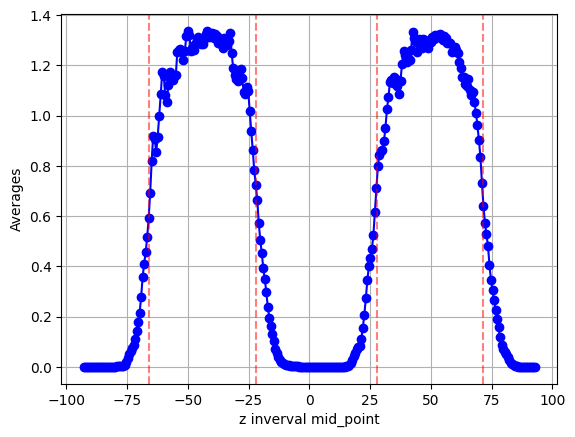

In [163]:
#enter the name of the data ("data"+number)



surface(data)